In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1Ft2rCLy3ZsNq2fCIJyCcbTuFCaO2NCpI'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_data.csv')  
train_data = pd.read_csv('train_data.csv', sep=',')

In [91]:
train_data.shape

(60000, 784)

In [92]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,147.0,255.0,246.0,249.0,249.0,249.0,249.0,249.0,249.0,249.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,106.0,209.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,245.0,244.0,243.0,247.0,253.0,255.0,253.0,250.0,232.0,193.0
2,0.0,0.0,14.0,33.0,68.0,101.0,109.0,120.0,122.0,109.0,...,49.0,22.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,...,74.0,6.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,103.0,29.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0


In [0]:
link = 'https://drive.google.com/open?id=1favMmND8APBbkIbH0zqYI6lgLa0sgLYW'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_data.csv')  
test_data = pd.read_csv('test_data.csv', sep=',')

In [94]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,234.0,255.0,255.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,112.0,157.0,225.0,255.0,254.0,255.0,255.0,255.0,255.0,254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,61.0,92.0,...,250.0,250.0,250.0,250.0,250.0,250.0,250.0,251.0,255.0,255.0
4,1.0,0.0,4.0,126.0,163.0,206.0,255.0,254.0,255.0,234.0,...,2.0,133.0,165.0,226.0,255.0,253.0,255.0,214.0,163.0,101.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data.values)
test_data = scaler.transform(test_data.values)

In [96]:
test_data

array([[0.91764706, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43921569, 0.61568627, 0.88235294, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55686275, 0.55686275, 0.55686275, ..., 1.        , 0.98039216,
        0.97254902],
       [0.84705882, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88235294, 1.        , 1.        , ..., 1.        , 1.        ,
        0.89411765]])

In [97]:
test_data.shape

(10000, 784)

In [0]:
link = 'https://drive.google.com/open?id=1XAxwFBmnu4lJy0MhcbQq4719d2pSsQvR'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_labels.csv')  
train_labels = pd.read_csv('train_labels.csv', sep=',')

In [99]:
train_labels.head()

,0
0,5
1,8
2,8
3,6
4,3


In [100]:
train_labels.shape

(60000, 1)

In [0]:
link = 'https://drive.google.com/open?id=1-B0jJnkNAtOnEONGRxLt5lbUA49iDPWa'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_labels.csv')  
test_labels = pd.read_csv('test_labels.csv', sep=',')

In [102]:
test_labels.head()

,0
0,3
1,5
2,9
3,2
4,7


In [103]:
test_labels.shape

(10000, 1)

In [0]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [105]:
test_data[0][0]

array([[0.91764706],
       [1.        ],
       [1.        ],
       [0.99607843],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.98039216],
       [0.85882353],
       [0.75294118],
       [0.61960784],
       [0.38039216],
       [0.14117647],
       [0.        ],
       [0.        ],
       [0.00392157],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [0]:
# --- Façon moins correcte de standardiser --- #

# train_data = train_data.astype('float32') / 255.
# test_data = test_data.astype('float32') / 255.

In [107]:
train_data

array([[[[0.57647059],
         [1.        ],
         [0.96470588],
         ...,
         [0.97647059],
         [0.98039216],
         [0.29803922]],

        [[0.59215686],
         [1.        ],
         [0.98823529],
         ...,
         [1.        ],
         [0.79215686],
         [0.02745098]],

        [[0.59215686],
         [1.        ],
         [0.98823529],
         ...,
         [1.        ],
         [0.27843137],
         [0.        ]],

        ...,

        [[0.        ],
         [0.20784314],
         [0.79215686],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00784314],
         [0.        ],
         [0.01568627],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.01176471],
         [0.01176471],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.41568627],
         [0.81960784],
         [1.  

In [108]:
train_data.shape

(60000, 28, 28, 1)

In [109]:
train_data

array([[[[0.57647059],
         [1.        ],
         [0.96470588],
         ...,
         [0.97647059],
         [0.98039216],
         [0.29803922]],

        [[0.59215686],
         [1.        ],
         [0.98823529],
         ...,
         [1.        ],
         [0.79215686],
         [0.02745098]],

        [[0.59215686],
         [1.        ],
         [0.98823529],
         ...,
         [1.        ],
         [0.27843137],
         [0.        ]],

        ...,

        [[0.        ],
         [0.20784314],
         [0.79215686],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00784314],
         [0.        ],
         [0.01568627],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.01176471],
         [0.01176471],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.41568627],
         [0.81960784],
         [1.  

In [110]:
test_data.shape

(10000, 28, 28, 1)

In [0]:
train_labels = train_labels.values.reshape(train_labels.shape[0],)
test_labels = test_labels.values.reshape(test_labels.shape[0],)

In [112]:
train_labels.shape

(60000,)

In [113]:
test_labels.shape

(10000,)

In [0]:
# from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
# from keras.models import Model
# from keras import backend as K
# from sklearn.metrics import mean_squared_error

# input_img = Input(shape=(28, 28, 1))

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(1, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder = Model(input_img, decoded)

#autoencoder.compile(optimizer='RMSProp', loss='MSE')

# from keras.callbacks import TensorBoard

# history = autoencoder.fit(train_data, train_data,
#                 epochs=10,
#                 batch_size=128,
#                 shuffle=True,
#                 validation_data=(test_data, test_data),
#                 callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

#encoder = Model(input_img, encoded)

# encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# # this is our input placeholder
# input_img = Input(shape=(784,))
# # "encoded" is the encoded representation of the input
# encoded = Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = Dense(784, activation='sigmoid')(encoded)

# # this model maps an input to its reconstruction
# autoencoder = Model(input_img, decoded)

# encoded_input = Input(shape=(encoding_dim,))
# decoder_layer = autoencoder.layers[-1]
# decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,
                                                             train_data, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [0]:
from keras.layers.convolutional import MaxPooling2D, UpSampling2D, Conv2D
from keras.optimizers import RMSprop

input_img = Input(shape=(28, 28, 1))

def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [0]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [129]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 128)         147584    
__________

In [133]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=128,epochs=10,verbose=1,validation_data=(valid_X, valid_ground))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 118us/step - loss: 0.0360 - val_loss: 0.0125
Epoch 2/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0103 - val_loss: 0.0105
Epoch 3/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0073 - val_loss: 0.0061
Epoch 4/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0058 - val_loss: 0.0058
Epoch 5/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0050 - val_loss: 0.0044
Epoch 6/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0044 - val_loss: 0.0035
Epoch 7/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0039 - val_loss: 0.0034
Epoch 8/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0036 - val_loss: 0.0033
Epoch 9/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0033 - val_loss: 0.0

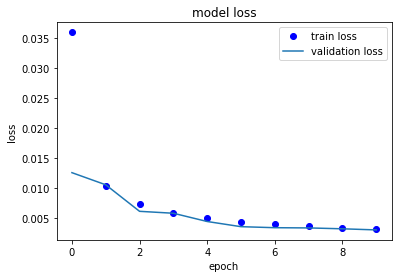

In [134]:
plt.plot(autoencoder_train.history['loss'], 'bo')
plt.plot(autoencoder_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [0]:
prediction = autoencoder.predict(test_data)

Test des images


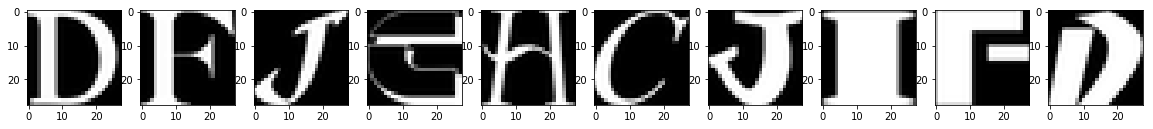

Reconstruction du jeu de test d'images


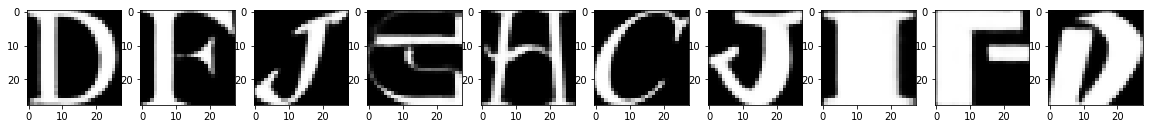

In [137]:
plt.figure(figsize=(20, 4))
print("Test des images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction du jeu de test d'images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(prediction[i, ..., 0], cmap='gray')  
plt.show()

In [0]:
noise_factor = 0.5
x_train_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)
x_valid_noisy = valid_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=valid_X.shape)
x_test_noisy = test_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_data.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

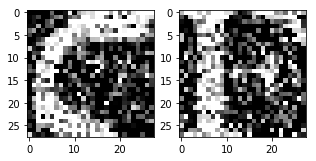

In [139]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

In [0]:
batch_size = 128
epochs = 20
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))

In [0]:
def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D((2,2))(conv5)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)
    return decoded

In [0]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [143]:
autoencoder_train = autoencoder.fit(x_train_noisy, train_X, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid_noisy, valid_X))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 118us/step - loss: 0.0525 - val_loss: 0.0242
Epoch 2/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0244 - val_loss: 0.0228
Epoch 3/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0208 - val_loss: 0.0189
Epoch 4/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0190 - val_loss: 0.0174
Epoch 5/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.0179 - val_loss: 0.0182
Epoch 6/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0172 - val_loss: 0.0171
Epoch 7/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0166 - val_loss: 0.0171
Epoch 8/20
48000/48000 [==============================] - 5s 114us/step - loss: 0.0161 - val_loss: 0.0158
Epoch 9/20
48000/48000 [==============================] - 5s 112us/step - loss: 0.0157 - val_loss: 0.0

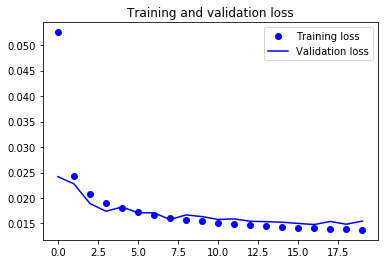

In [144]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
pred = autoencoder.predict(x_test_noisy)


Test des images


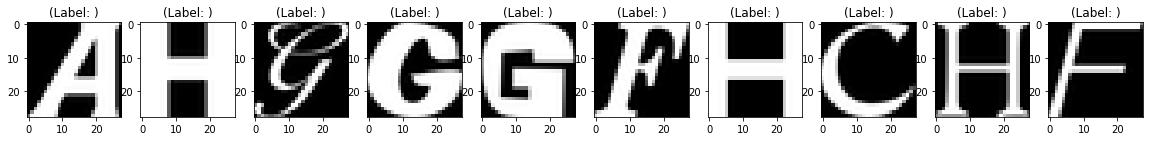

Test des images avec du bruit


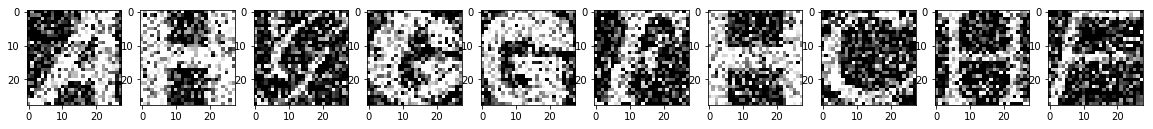

Reconstruction du jeu d'images avec bruit


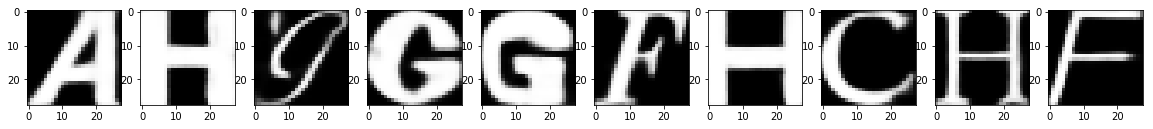

In [148]:
plt.figure(figsize=(20, 4))
print("Test des images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i, ..., 0], cmap='gray')
    curr_lbl = test_labels[i]
    plt.title("(Label: " + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test des images avec du bruit")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()   

plt.figure(figsize=(20, 4))
print("Reconstruction du jeu d'images avec bruit")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()